## IMPORTING LIBS

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
num_classes = 10
epochs = 10

## IMPORTING DATASET

In [2]:
train_df=pd.read_csv('mnist_train.csv')
test_df=pd.read_csv('mnist_test.csv')

In [3]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 59.9 MB


## SPLIT TRAIN DATA INTO X AND Y

In [6]:
##convert data into float which is acceptable
##to keras
train_data=np.array(train_df, dtype='float32')
test_data=np.array(test_df, dtype='float32')

In [7]:
##divide into x and y and scaling all values between 0 and 1
# and since greyscale values are between 0 and 255(max) so divide by 255
x_train=train_data[:,1:]/255
y_train=train_data[:,0]
x_test=test_data[:,1:]/255
y_test=test_data[:,0]

## Train-test-valid dataset
done using scikitlearn lib

In [8]:
x_train,x_validate, y_train, y_validate=train_test_split(x_train,y_train,test_size=0.2, random_state=1)

## Visualise the training 

# CREATE THE CNN MODEL

In [9]:
image_rows=28
image_cols=28
image_shape=(image_rows,image_cols,1)

In [10]:
x_train =x_train.reshape(x_train.shape[0], *image_shape)
x_test =x_test.reshape(x_test.shape[0], *image_shape)

## Building a convolution layer

In [11]:
cnn_model=Sequential([
    Conv2D(filters=12,kernel_size=3, activation='relu', input_shape=image_shape),
    MaxPooling2D(pool_size=2, strides=2),
    
])

## Building a 2nd convolution layer

In [12]:
cnn_model=Sequential([
    Conv2D(filters=12,kernel_size=3, activation='relu', input_shape=image_shape),
    MaxPooling2D(pool_size=2, strides=2),
    
])

## Flattening

In [13]:
cnn_model.add(tf.keras.layers.Flatten())

## Full Connection

In [14]:
cnn_model.add(tf.keras.layers.Dense(units=10, activation='relu'))

In [15]:
cnn_model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

## Compile the model

In [16]:
cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'] )

## Training the model

In [17]:
cnn_model.fit(
    x_train, 
    y_train, 
    epochs=10, 
    validation_data=(x_test,y_test)
)

Epoch 1/10
1500/1500 [==============================] - 15s 10ms/step - loss: 0.6536 - accuracy: 0.7666 - val_loss: 0.4801 - val_accuracy: 0.8334
Epoch 2/10
1500/1500 [==============================] - 14s 9ms/step - loss: 0.4501 - accuracy: 0.8421 - val_loss: 0.4164 - val_accuracy: 0.8556
Epoch 3/10
1500/1500 [==============================] - 15s 10ms/step - loss: 0.4031 - accuracy: 0.8597 - val_loss: 0.3870 - val_accuracy: 0.8689
Epoch 4/10
1500/1500 [==============================] - 15s 10ms/step - loss: 0.3743 - accuracy: 0.8686 - val_loss: 0.3733 - val_accuracy: 0.8684
Epoch 5/10
1500/1500 [==============================] - 16s 11ms/step - loss: 0.3514 - accuracy: 0.8785 - val_loss: 0.3568 - val_accuracy: 0.8757
Epoch 6/10
1500/1500 [==============================] - 14s 9ms/step - loss: 0.3315 - accuracy: 0.8839 - val_loss: 0.3437 - val_accuracy: 0.8818
Epoch 7/10
1500/1500 [==============================] - 14s 9ms/step - loss: 0.3166 - accuracy: 0.8907 - val_loss: 0.3307 - va

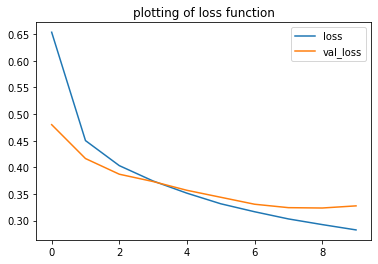

In [18]:
model_losses=pd.DataFrame(cnn_model.history.history)
plt.plot(model_losses['loss'], label='loss')
plt.plot(model_losses['val_loss'], label='val_loss')

plt.title('plotting of loss function')
plt.legend()

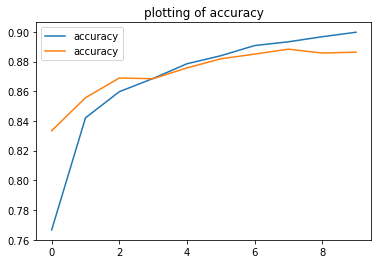

In [19]:
plt.title('plotting of accuracy')
plt.plot(model_losses['accuracy'], label='accuracy')
plt.plot(model_losses['val_accuracy'], label='accuracy')
plt.legend()

<AxesSubplot:>

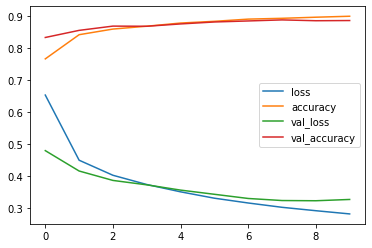

In [20]:
model_losses.plot()

## EVALUATE/SCORE THE MODE

In [21]:
score=cnn_model.evaluate(x_test, y_test, verbose=0)
score

[0.32759007811546326, 0.8863000273704529]

In [22]:
print(f'test loss={score[0]}')
print(f'test accuracy={score[1]}')

test loss=0.32759007811546326
test accuracy=0.8863000273704529


In [23]:
#predictions
yestimated=cnn_model.predict(x_test)

In [24]:
yestimated

array([[9.3840241e-01, 1.5885110e-10, 1.2271109e-04, ..., 6.6654779e-11,
        3.0494688e-04, 5.7158397e-12],
       [1.2388484e-09, 9.9959296e-01, 5.1625966e-09, ..., 1.1281232e-18,
        1.0572336e-11, 4.0707313e-08],
       [5.2465096e-02, 2.4416456e-06, 4.2741776e-01, ..., 1.8490165e-16,
        1.0171991e-05, 2.9906358e-14],
       ...,
       [2.7791179e-07, 6.3855513e-13, 5.3613853e-08, ..., 2.4500267e-07,
        9.9989939e-01, 3.8062153e-09],
       [1.5711087e-03, 1.1209653e-09, 9.7535099e-05, ..., 8.9902265e-08,
        9.9176568e-01, 1.7430311e-08],
       [4.7325683e-04, 8.6318511e-01, 3.0347973e-03, ..., 2.2086563e-11,
        5.0871753e-05, 4.0644513e-06]], dtype=float32)

In [25]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, yestimated)
cm

ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets